# Aim:
Prepare a model for glass classification using KNN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('glass.csv')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [4]:
df.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

## Data visualization

In [5]:
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['figure.dpi'] = 200
sns.set_style('darkgrid')

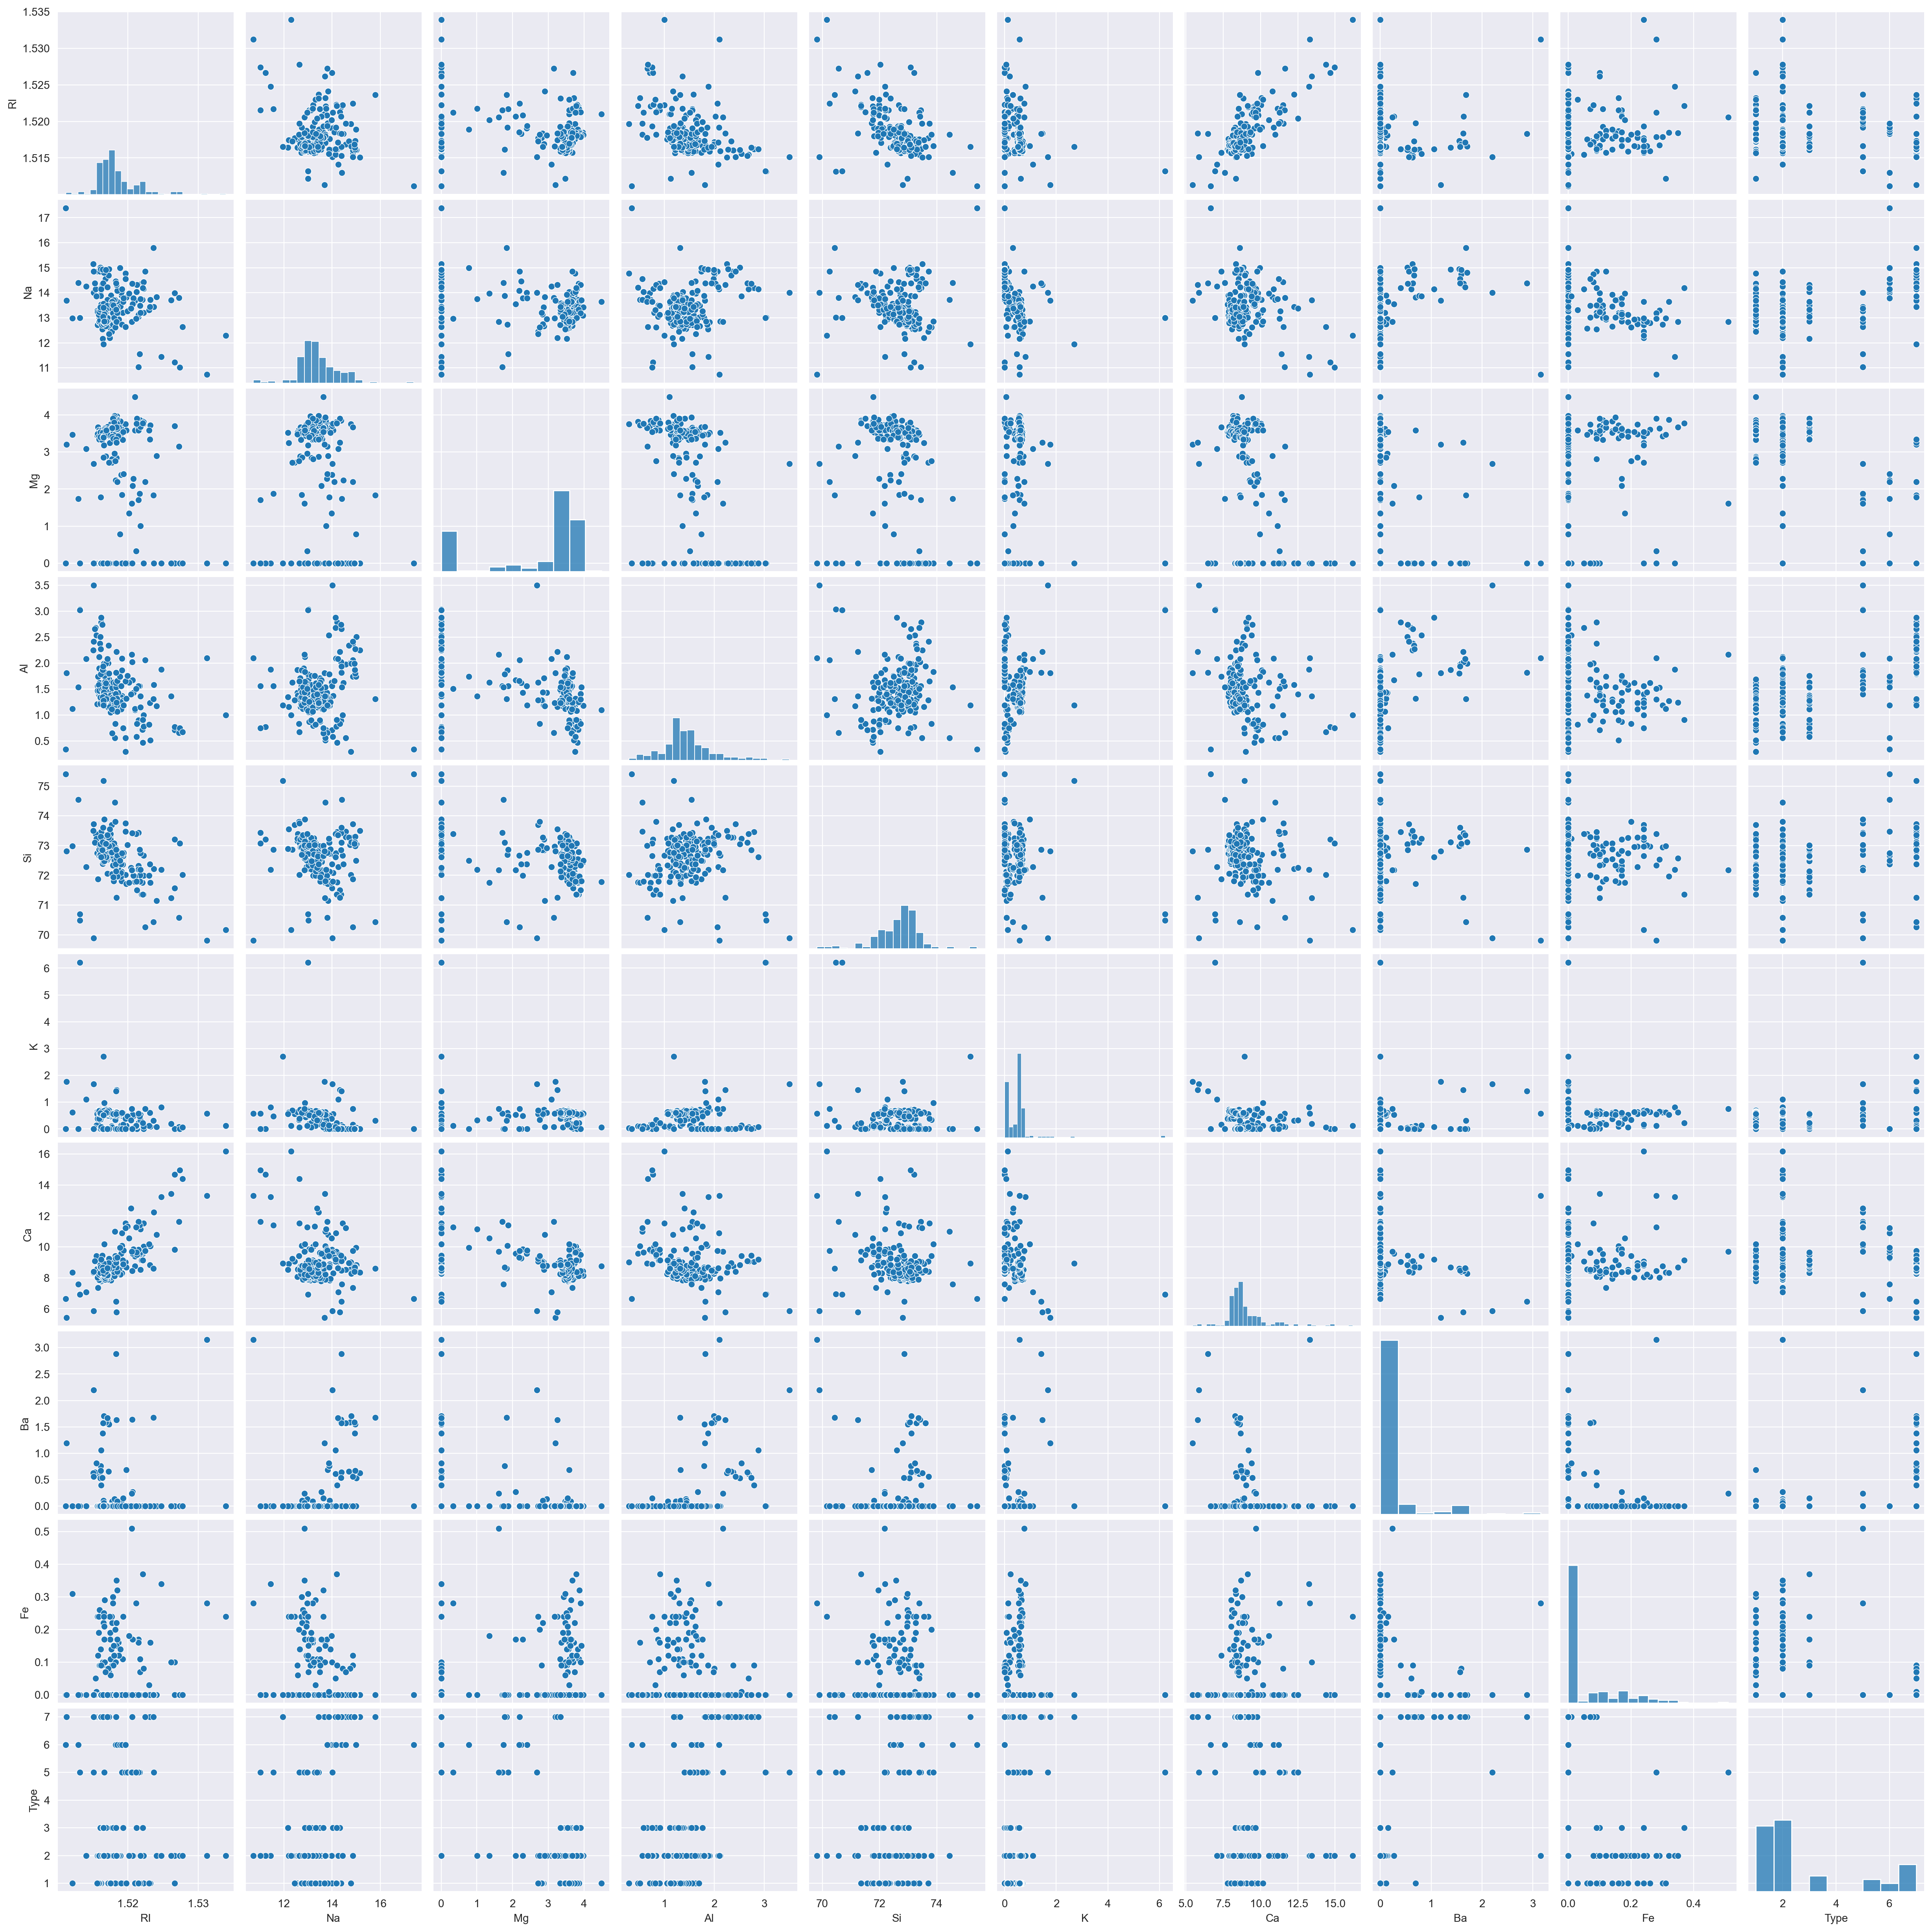

In [6]:
sns.pairplot(df)

In [7]:
df['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

<Axes: xlabel='Type', ylabel='count'>

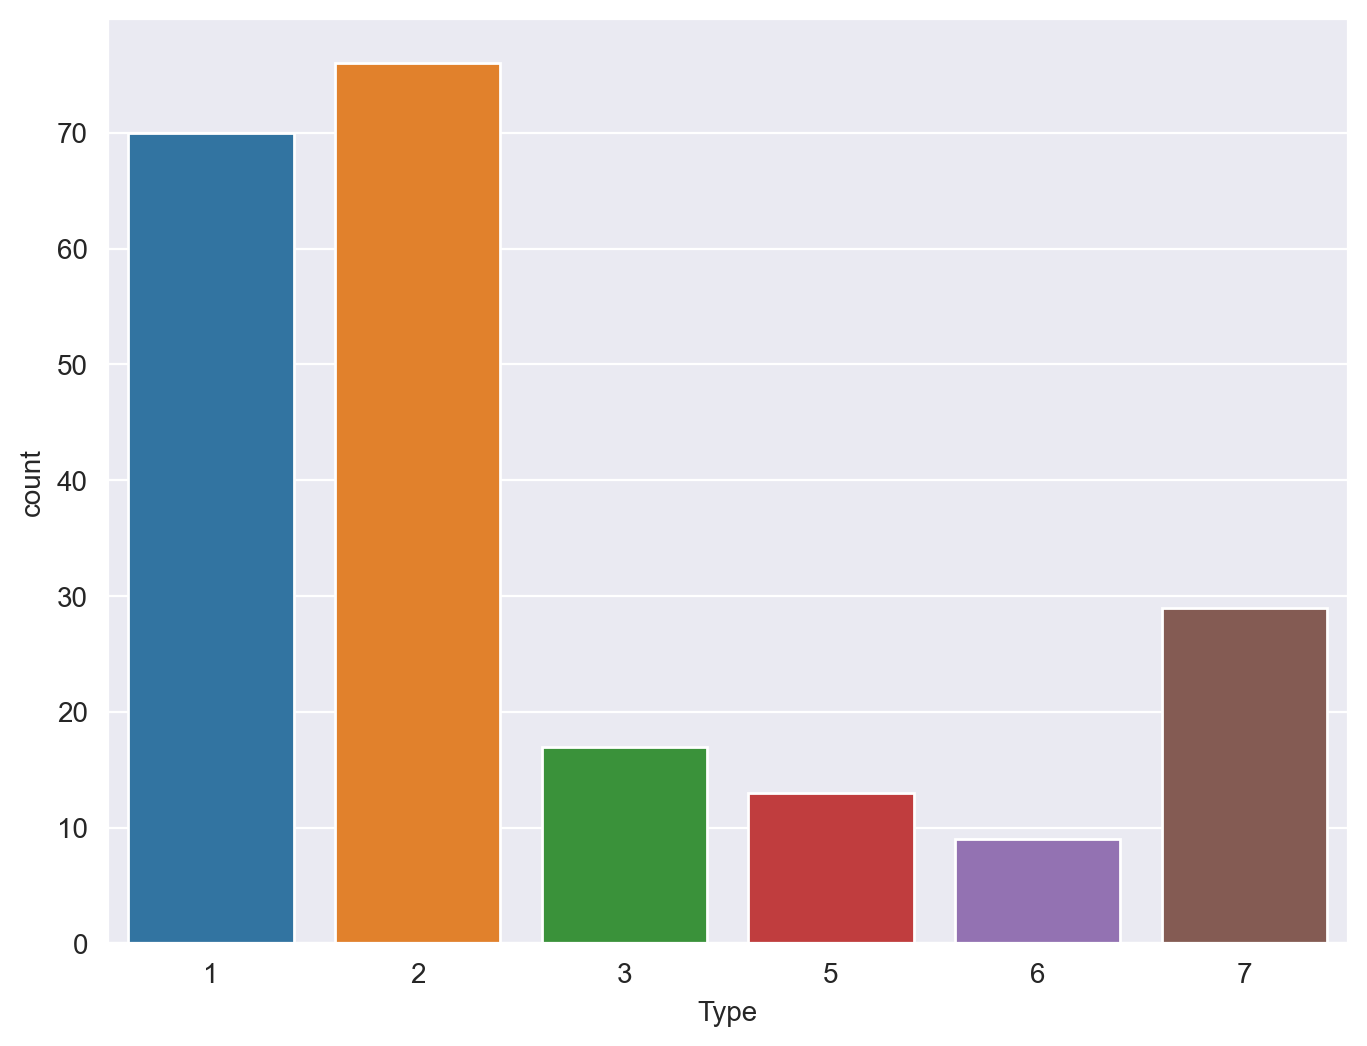

In [10]:
sns.countplot(x=df['Type'])

## Spliting data

In [11]:
x = df.iloc[:,:-1]
y = df['Type']

## Building model

In [12]:
knn = KNeighborsClassifier()
kfold = KFold(n_splits=20)

In [13]:
c = cross_val_score(knn, x, y, cv=kfold)
c.mean()

0.5286363636363637

## Hyperparameter Tuning

In [14]:
params = {
    'n_neighbors' : np.array(range(1,30)),
    'weights' : ['uniform', 'distance'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
    }

In [15]:
grid = GridSearchCV(estimator=knn, param_grid=params)

In [16]:
grid.fit(x, y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
                         'weights': ['uniform', 'distance']})

In [17]:
grid.best_params_

{'algorithm': 'auto', 'n_neighbors': 1, 'weights': 'uniform'}

In [18]:
grid.best_score_

0.640531561461794

## Improved model

In [19]:
knn = KNeighborsClassifier(n_neighbors=1)

In [20]:
c = cross_val_score(knn, x, y, cv=kfold)
c.mean()

0.5831818181818182

In [21]:
knn.fit(x, y)
pred = knn.predict(x)
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7], dtype=int64)

In [22]:
df['Pred'] = pred
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,Pred
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7,7


In [23]:
df['Pred'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Pred, dtype: int64